# Check the probabilistic output

To be confident about the model estimates the distribution of the population instead of the sampling distribution, a good practice is running the model on some synthetic data with different sizes drawn from the same population. If the standard deviation of the predicted distribution does not decrease with the increase of the data size, we can be confident that the output from the model is an estimate of the population distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import sys
sys.path.insert(1, '../src')

from preprocessing import*
from xgboost_functions import*
from random_forest_functions import*
from model_evaluation import*

In the following section, we will use Random Forest model, Gradient Boosting model as well as the linear quantile regression model to perform quantile regression on some synthetic data. The true population distribution of the response `y` is a normal distribution with the mean determined by the predictor `x`.

We will fit the models with different size of the training set. If the predicted distribution does not get narrower as the size of the training set gets larger, we can be confident that our model estimates the distribution of the population. It is suggested to run the following chunks of code several times to detect the pattern.

## Random forest with 100 observations

The standard deviation of the predicted distribution is 0.58.


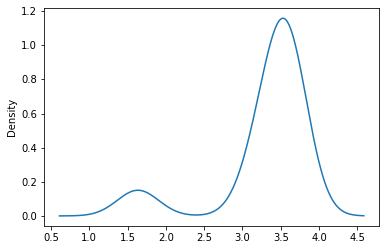

In [2]:
# Generate the synthetic data
N = 100
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn RandomForestRegressor model
x_new = x.reshape(N,1)
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1) 
rf.fit(x_new, y)

quantiles = np.arange(.01, .99, .02)
# Make the prediction when x is 1
quantile1 = rf_quantile(rf, [[1]], quantiles)

# Plot the density
pd.Series(quantile1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quantile1)))

## Random forest with 1000 observations

The standard deviation of the predicted distribution is 0.37.


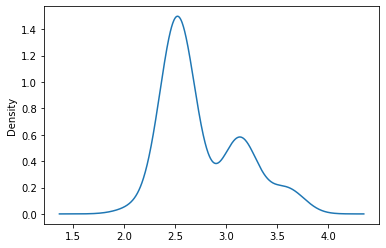

In [3]:
# Generate the synthetic data
N = 1000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn RandomForestRegressor model
x_new = x.reshape(N,1)
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1) 
rf.fit(x_new, y)

quantiles = np.arange(.01, .99, .02)
# Make the prediction when x is 1
quantile1 = rf_quantile(rf, [[1]], quantiles)

# Plot the density
pd.Series(quantile1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quantile1)))

## Random forest with 10000 observations

The standard deviation of the predicted distribution is 0.91.


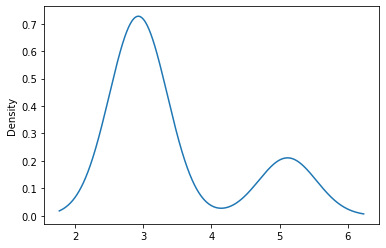

In [21]:
# Generate the synthetic data
N = 10000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn RandomForestRegressor model
x_new = x.reshape(N,1)
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1) 
rf.fit(x_new, y)

quantiles = np.arange(.01, .99, .02)
# Make the prediction when x is 1
quantile1 = rf_quantile(rf, [[1]], quantiles)

# Plot the density
pd.Series(quantile1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quantile1)))

As we can see from the above result, the standard deviation of the predicted distribution does not decrease as the increase of the data size. This means that the Random Forest we built can actually estimate the population distribution.

We also tested the gradient boosting and linear quantile regression model.

## Gradient Boosting

In [22]:
def gb_quantile(X_train, train_labels, X, q):
    """
    Fit and predict the quantile using gradient boosting model
    """
    gbf = GradientBoostingRegressor(loss='quantile', alpha=q,
                                             n_estimators=100,
                                             max_depth=3,
                                             learning_rate=0.1, min_samples_leaf=9,
                                             min_samples_split=9)
    gbf.fit(X_train, train_labels)
    
    return gbf.predict(X)

## Gradient Boosting with 100 observations

The standard deviation of the predicted distribution is 0.90.


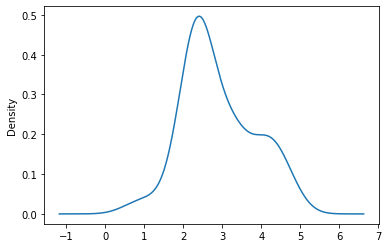

In [30]:
# Generate the synthetic data
N = 100
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn GradientBoostingRegressor model
x_new = x.reshape(N,1)

quantiles = np.arange(.01, .99, .02)

# Predict and plot the density
gb_quanitle1 = np.concatenate(
            [gb_quantile(x_new, y, [[1]], q) for q in quantiles])
pd.Series(gb_quanitle1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(gb_quanitle1)))

## Gradient Boosting with 1000 observations

The standard deviation of the predicted distribution is 0.74.


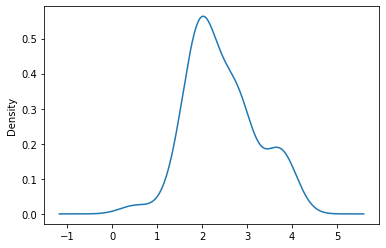

In [27]:
# Generate the synthetic data
N = 1000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn GradientBoostingRegressor model
x_new = x.reshape(N,1)

quantiles = np.arange(.01, .99, .02)

# Predict and plot the density
gb_quanitle1 = np.concatenate(
            [gb_quantile(x_new, y, [[1]], q) for q in quantiles])
pd.Series(gb_quanitle1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(gb_quanitle1)))

## Gradient Boosting with 10000 observations

The standard deviation of the predicted distribution is 0.96.


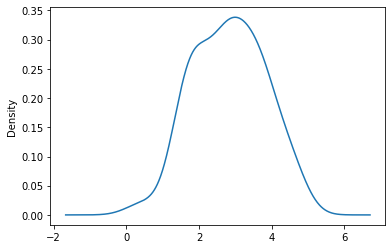

In [28]:
# Generate the synthetic data
N = 10000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)

# Reshape the predictor to train the sklearn GradientBoostingRegressor model
x_new = x.reshape(N,1)

quantiles = np.arange(.01, .99, .02)

# Predict and plot the density
gb_quanitle1 = np.concatenate(
            [gb_quantile(x_new, y, [[1]], q) for q in quantiles])
pd.Series(gb_quanitle1).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(gb_quanitle1)))

The gradient boosting model with built-in quantile loss function still estimates the population distribution. Despite the longer running time, the predicted distributions of the gradient boosting model look more like normal distribution than the random forest. Although the results from the gradient boosting model are very similar as the results from the random forest model when we predicted the flow rate, with more powerful computation and better predictors, the gradient boosting model may perform better.

## Results from quantile regression

## 100 observations

/home/marvin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:235: RuntimeWarning: invalid value encountered in less_equal
  kernels['epa'] = lambda u: 3. / 4 * (1-u**2) * np.where(np.abs(u) <= 1, 1, 0)


The standard deviation of the predicted distribution is 0.80.


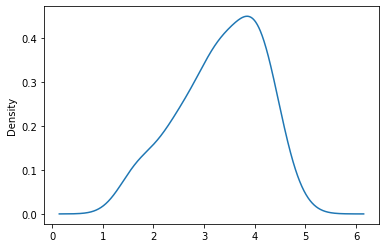

In [37]:
# Generate the synthetic data
N = 100
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)
df = pd.DataFrame({'x':x, 'y':y})

quantreg = smf.quantreg('y~x', data = df)

model_list = []
quantiles = np.arange(.01, .99, .02)

for q in quantiles:
    model_list.append(quantreg.fit(q=q))
    
quan_reg = np.concatenate([model_list[k].predict(pd.DataFrame({"x": [1]})) for k in range(len(quantiles))])

pd.Series(quan_reg).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quan_reg)))

## 1000 observations

The standard deviation of the predicted distribution is 1.01.


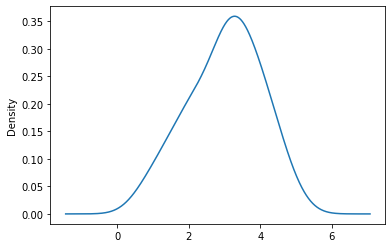

In [38]:
# Generate the synthetic data
N = 1000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)
df = pd.DataFrame({'x':x, 'y':y})

quantreg = smf.quantreg('y~x', data = df)

model_list = []
quantiles = np.arange(.01, .99, .02)

for q in quantiles:
    model_list.append(quantreg.fit(q=q))
    
quan_reg = np.concatenate([model_list[k].predict(pd.DataFrame({"x": [1]})) for k in range(len(quantiles))])

pd.Series(quan_reg).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quan_reg)))

## 10000 observations

The standard deviation of the predicted distribution is 0.94.


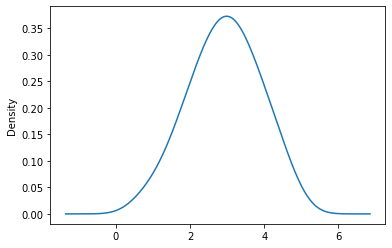

In [39]:
# Generate the synthetic data
N = 10000
x = np.arange(0, 1, 1/N)
y = np.random.normal(2*x + 1, 1)
df = pd.DataFrame({'x':x, 'y':y})

quantreg = smf.quantreg('y~x', data = df)

model_list = []
quantiles = np.arange(.01, .99, .02)

for q in quantiles:
    model_list.append(quantreg.fit(q=q))
    
quan_reg = np.concatenate([model_list[k].predict(pd.DataFrame({"x": [1]})) for k in range(len(quantiles))])

pd.Series(quan_reg).plot.density();
print("The standard deviation of the predicted distribution is {:.2f}.".format(np.std(quan_reg)))

Linear quantile regression model estimates the population distribution as well.